Analysis and Detection of Autism Spectrum Disorder

In [956]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [957]:
#loading dataset
df=pd.read_csv(r"C:\Users\boolu\OneDrive - Manipal Academy of Higher Education\AI Grade Enterprise\Autism Spectrum Disorder Dataset.csv")
df

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0


In [958]:
df.head(10)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0
5,6,1,0,0,0,0,1,0,0,1,...,m,Middle Eastern,no,no,Jordan,no,9.562117,18 and more,Self,0
6,7,1,0,0,0,0,0,1,1,1,...,f,Pasifika,no,no,United Kingdom,no,7.984569,18 and more,Self,0
7,8,1,1,1,1,1,1,1,0,1,...,m,Black,no,yes,United States,no,13.237898,18 and more,Self,1
8,9,1,1,1,1,0,0,0,1,1,...,m,White-European,no,no,Brazil,no,-1.755774,18 and more,Self,0
9,10,0,0,0,0,0,0,0,1,0,...,f,Others,yes,no,New Zealand,no,14.922570,18 and more,Self,0


In [959]:
df.tail(10)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
790,791,1,0,1,1,1,1,1,0,1,...,m,Others,no,no,India,no,4.846236,18 and more,Self,0
791,792,0,0,0,1,1,1,0,0,0,...,m,Black,no,no,Australia,no,8.687281,18 and more,Self,0
792,793,1,0,0,0,0,0,0,0,0,...,m,?,no,no,Bolivia,no,9.403804,18 and more,Self,0
793,794,0,0,0,0,0,0,0,0,0,...,m,?,no,no,United Kingdom,no,9.777375,18 and more,Self,0
794,795,0,1,0,0,1,0,0,1,0,...,m,?,no,no,India,no,9.592719,18 and more,Self,0
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,...,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [960]:
df.shape

(800, 22)

In [961]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [962]:
#looking for null values
df.isnull().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [963]:
#null value percentage
df.isnull().sum()/df.shape[0]*100

ID                 0.0
A1_Score           0.0
A2_Score           0.0
A3_Score           0.0
A4_Score           0.0
A5_Score           0.0
A6_Score           0.0
A7_Score           0.0
A8_Score           0.0
A9_Score           0.0
A10_Score          0.0
age                0.0
gender             0.0
ethnicity          0.0
jaundice           0.0
austim             0.0
contry_of_res      0.0
used_app_before    0.0
result             0.0
age_desc           0.0
relation           0.0
Class/ASD          0.0
dtype: float64

<Axes: >

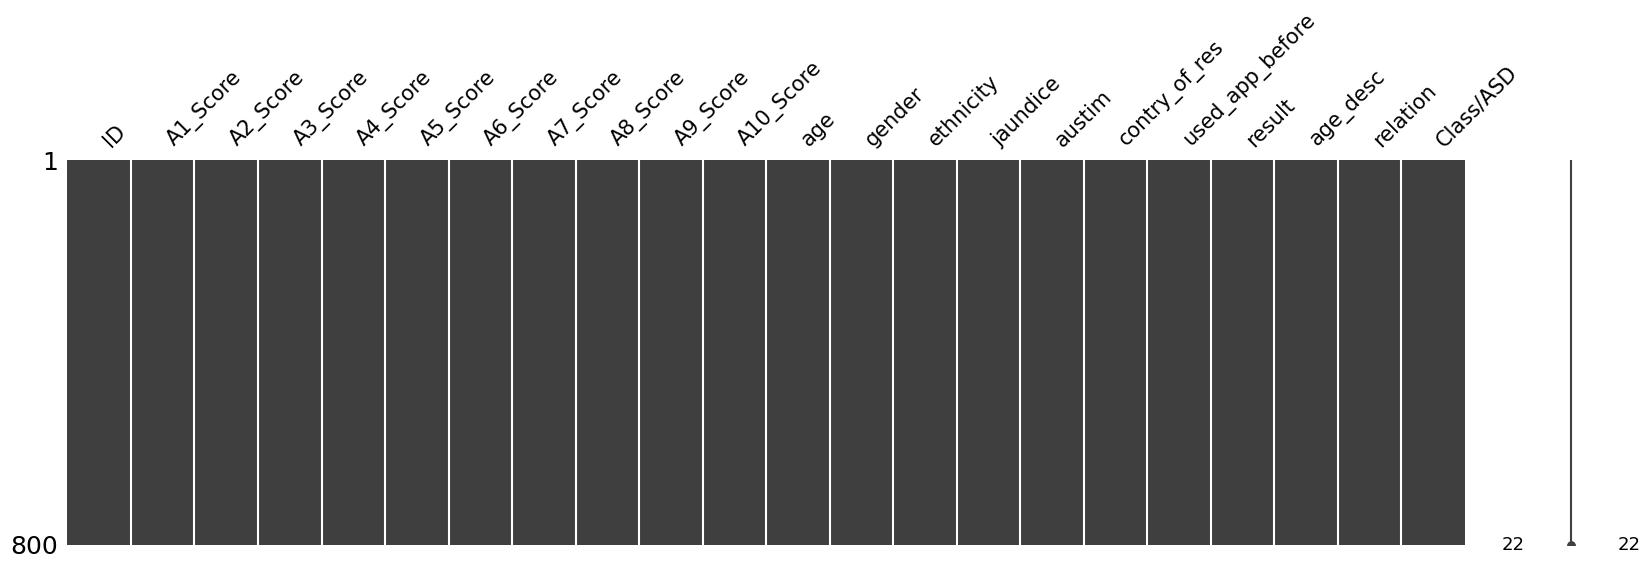

In [964]:
#visualizing null values
msno.matrix(df, sort="ascending", figsize=(20,5), fontsize=15)

In [965]:
df.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


In [966]:
print(df.A1_Score.value_counts())
print(df.A2_Score.value_counts())
print(df.A3_Score.value_counts())
print(df.A4_Score.value_counts())
print(df.A5_Score.value_counts())
print(df.A6_Score.value_counts())
print(df.A7_Score.value_counts())
print(df.A8_Score.value_counts())
print(df.A9_Score.value_counts())
print(df.A10_Score.value_counts())
#print(df.age.value_counts())
print(df.gender.value_counts())
print(df.ethnicity.value_counts())
print(df.jaundice.value_counts())
print(df.austim.value_counts())
print(df.contry_of_res.value_counts())
print(df.used_app_before.value_counts())
#print(df.result.value_counts())
print(df.age_desc.value_counts())
print(df.relation.value_counts())
print(df['Class/ASD'].value_counts())

A1_Score
1    448
0    352
Name: count, dtype: int64
A2_Score
1    424
0    376
Name: count, dtype: int64
A3_Score
0    440
1    360
Name: count, dtype: int64
A4_Score
0    468
1    332
Name: count, dtype: int64
A5_Score
0    484
1    316
Name: count, dtype: int64
A6_Score
0    557
1    243
Name: count, dtype: int64
A7_Score
0    482
1    318
Name: count, dtype: int64
A8_Score
1    407
0    393
Name: count, dtype: int64
A9_Score
0    404
1    396
Name: count, dtype: int64
A10_Score
1    494
0    306
Name: count, dtype: int64
gender
m    530
f    270
Name: count, dtype: int64
ethnicity
White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: count, dtype: int64
jaundice
no     615
yes    185
Name: count, dtype: int64
austim
no     669
yes    131
Name: count, dtype: 

df=df.replace({'yes':1,
               'no':0,
               '?':'Others',
                'others':'Others'})
df

In [967]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [968]:
#looking for duplicates
df.duplicated().sum()

np.int64(0)

In [969]:
print(df['ethnicity'].unique())
print(df['ethnicity'].nunique())
print(df['relation'].unique())
print(df['relation'].nunique())
print(df['gender'].unique())
print(df['gender'].nunique())
print(df['contry_of_res'].unique())
print(df['contry_of_res'].nunique())
print(df['age_desc'].unique())
print(df['age_desc'].nunique())


['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
12
['Self' 'Relative' 'Parent' '?' 'Others' 'Health care professional']
6
['f' 'm']
2
['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Viet Nam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy'
 'AmericanSamoa' 'Bahamas' 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka'
 'Russia' 'Bolivia' 'Azerbaijan' 'Armenia' 'Serbia' 'Ethiopia' 'Sweden'
 'Iceland' 'Hong Kong' 'Angola' 'China' 'Germany' 'Spain' 'Tonga'
 'Pakistan' 'Iran' 'Argentina' 'Japan' 'Mexico' 'Nicaragua' 'Sierra Leone'
 'Czech Republic' 'Niger' 'Romania' 'Cyprus' 'Belgium' 'Burundi'
 'Bangladesh']
56
['18 and more']
1


In [970]:
#cleaning the data
df=df.replace({'yes':1,
               'no':0,
               '?':'Others',
               'others': 'Others'})

Visualizing the Data

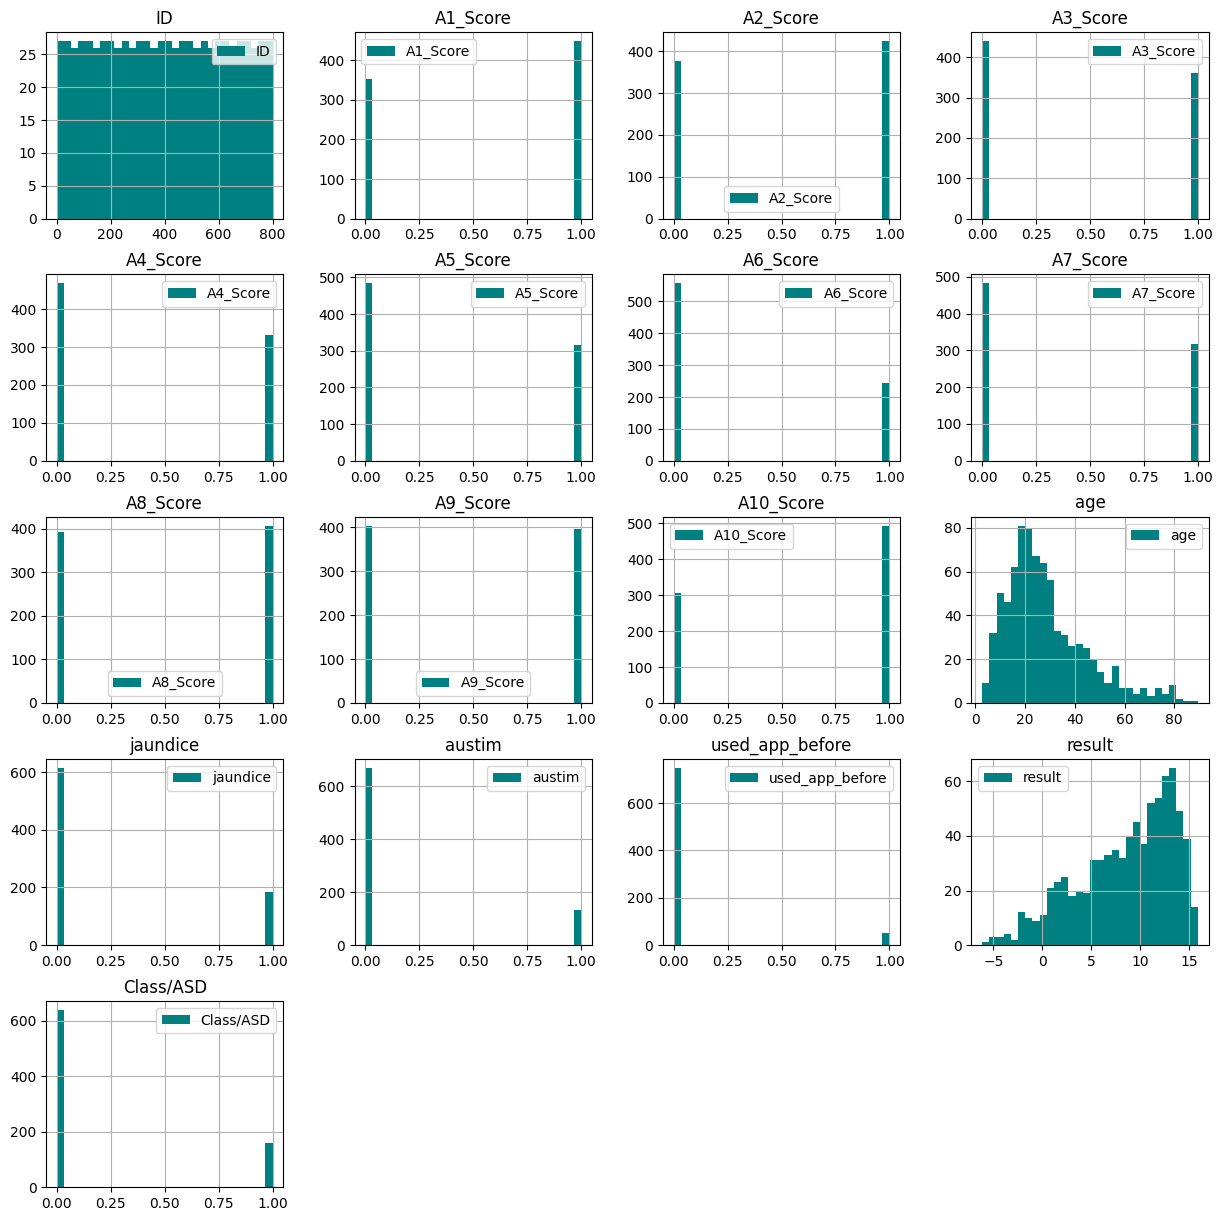

In [971]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(bins=30, figsize=(15,15),legend=bool,color='Teal')
plt.show()

In [972]:
df.gender.value_counts()


gender
m    530
f    270
Name: count, dtype: int64

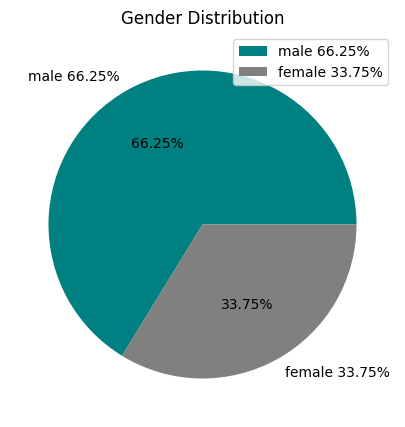

In [973]:
plt.pie(df['gender'].value_counts().values,autopct='%1.2f%%',colors=['teal','grey'], labels=['male 66.25%','female 33.75%'])
plt.gcf().set_size_inches(10,5)
plt.title('Gender Distribution')
plt.legend()
plt.show()

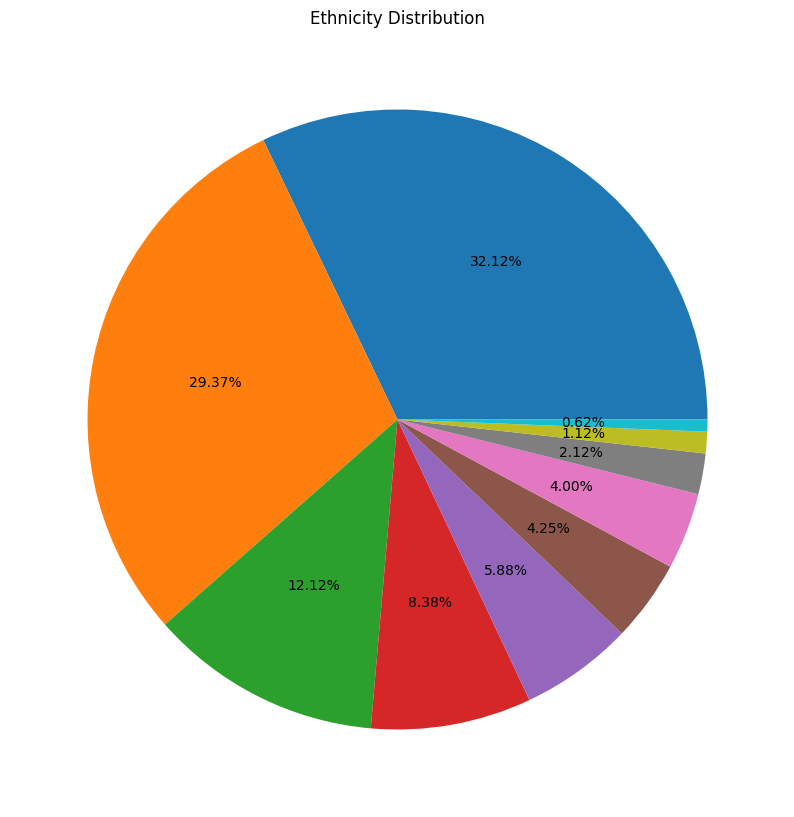

In [974]:
plt.pie(df['ethnicity'].value_counts().values,autopct='%1.2f%%')
plt.title('Ethnicity Distribution')
plt.gcf().set_size_inches(10,14)
plt.show()

Text(0.5, 1.0, 'Feature Correlation Matrix')

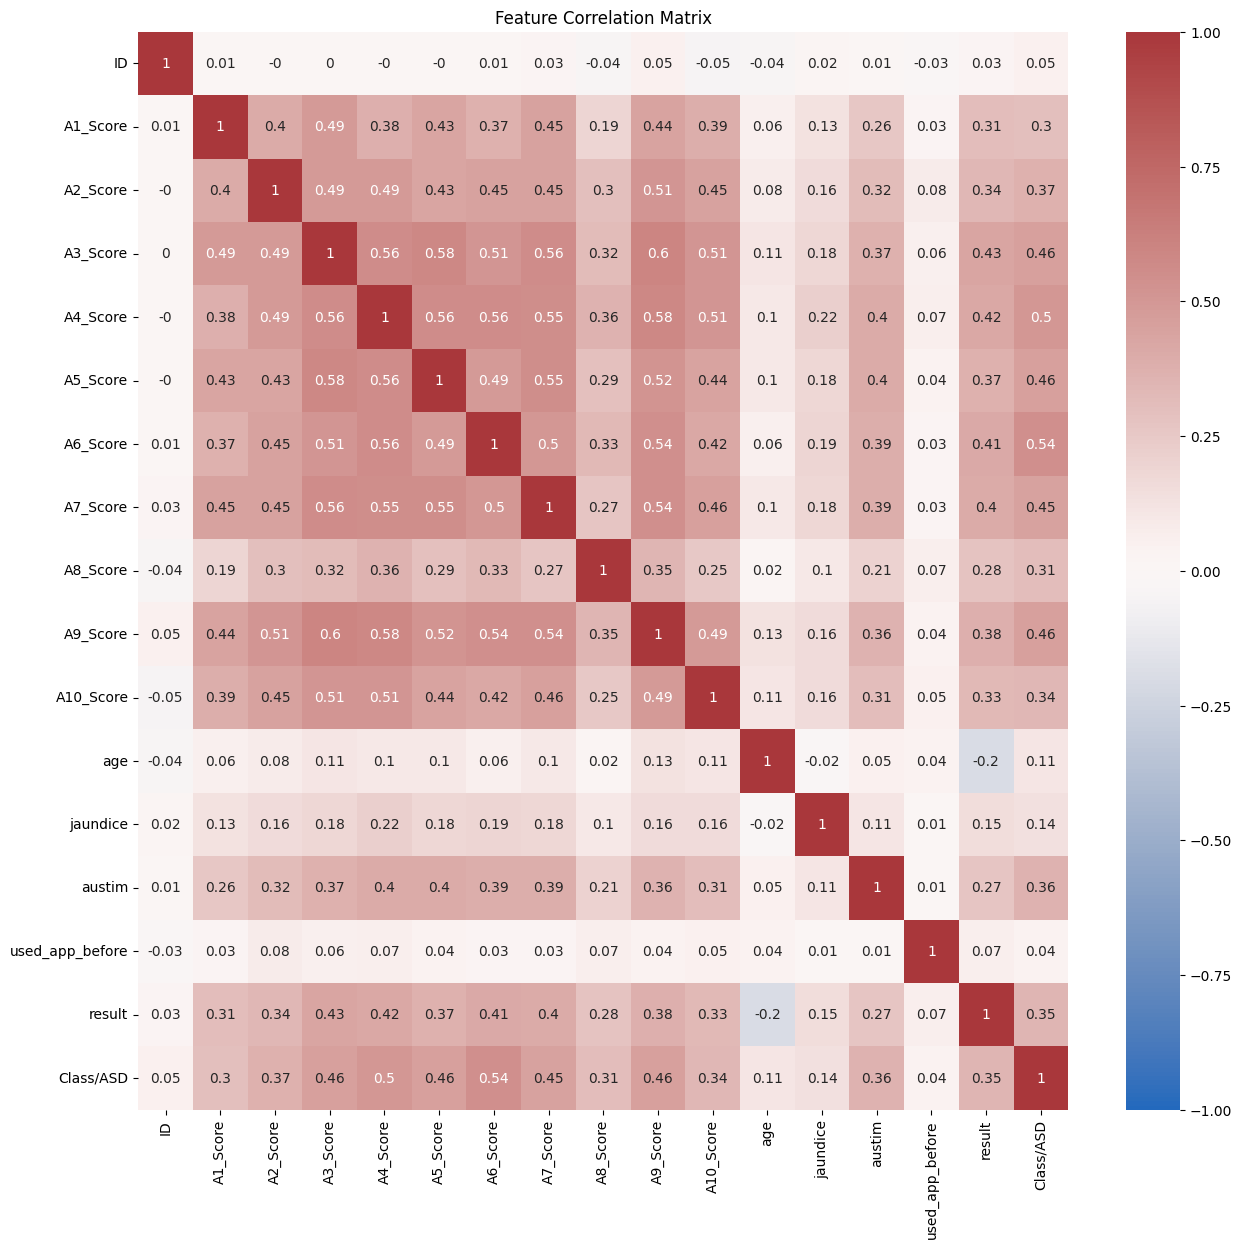

In [975]:
matrix=df.corr(numeric_only=bool).round(2)
sns.heatmap(matrix, cmap='vlag',vmin=-1, annot=True)
plt.gcf().set_size_inches(15,14)
plt.title('Feature Correlation Matrix')

Text(0.5, 1.0, 'Feature Correlation Matrix')

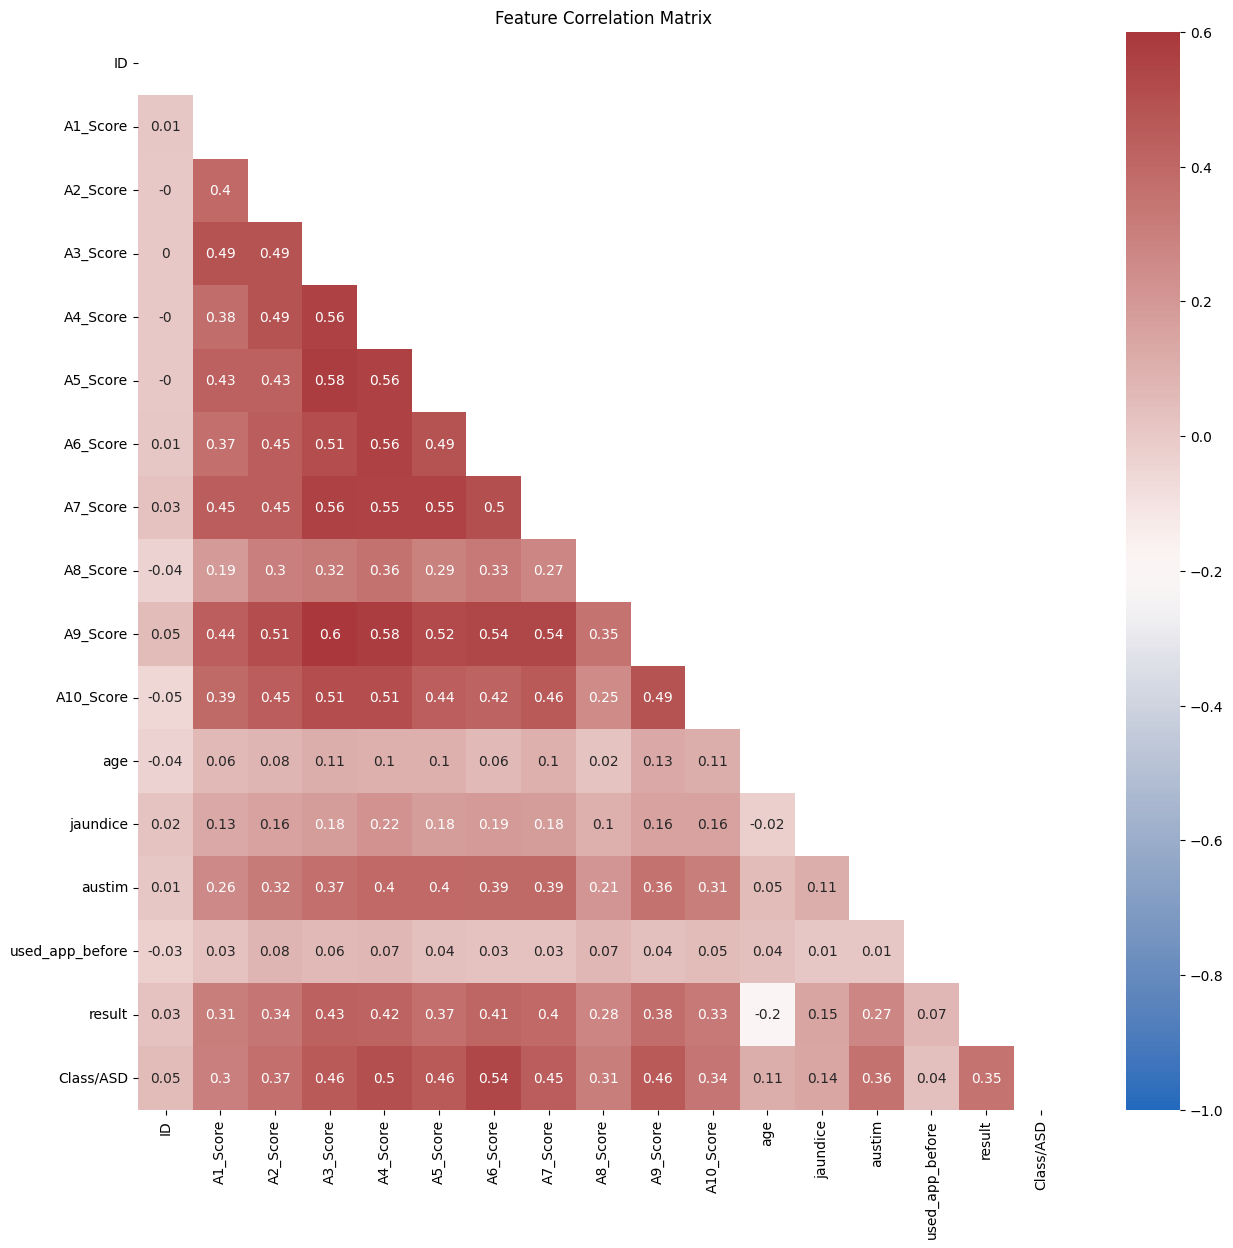

In [976]:
mask=np.triu(np.ones_like(matrix ,dtype=bool))
matrix=df.corr(numeric_only=bool).round(2)
sns.heatmap(matrix, cmap='vlag',annot=True,vmin=-1,mask=mask)
plt.gcf().set_size_inches(15,14)
plt.title('Feature Correlation Matrix')

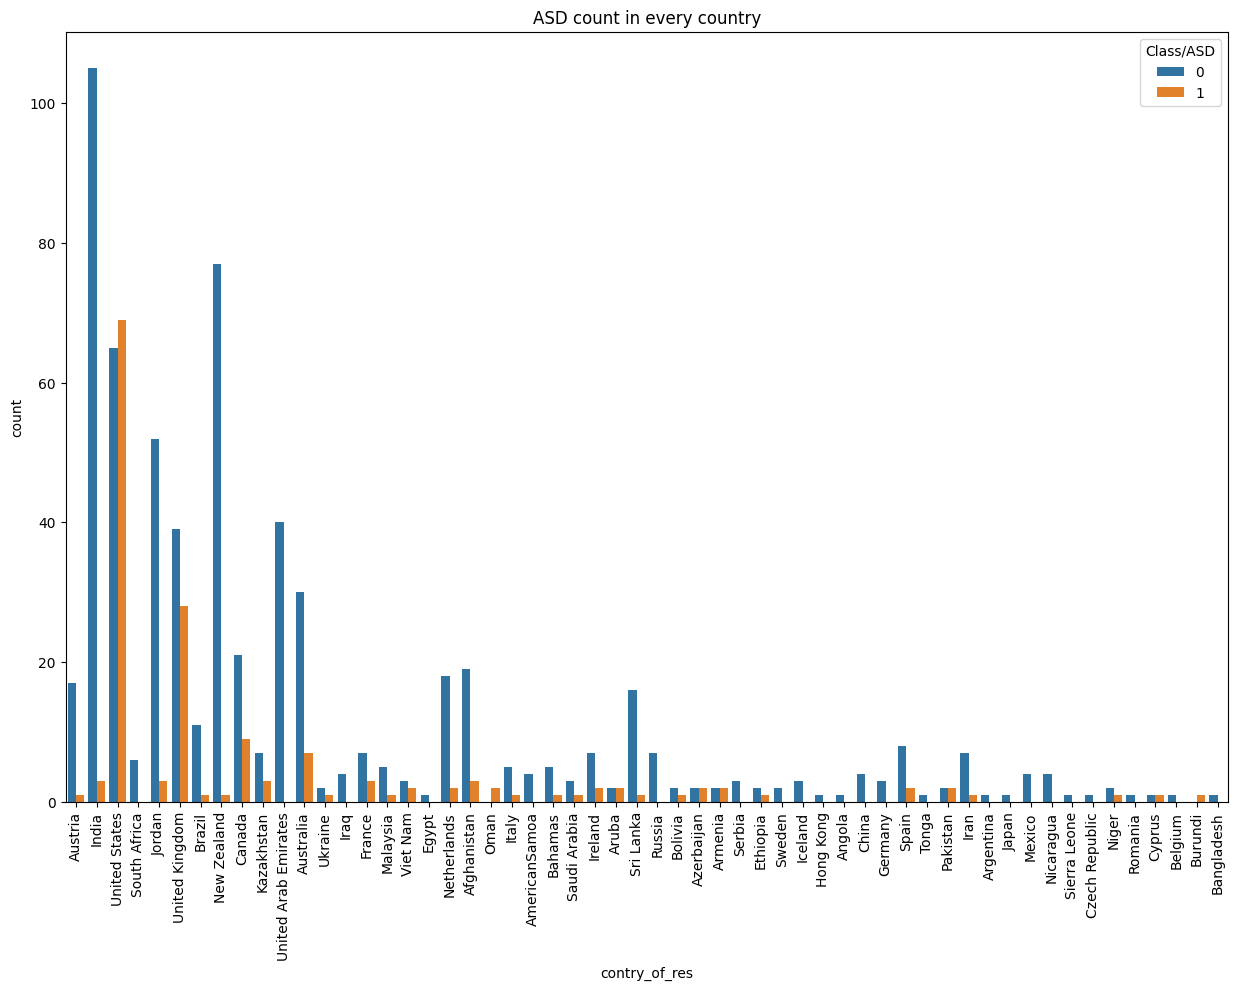

In [977]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='contry_of_res', hue='Class/ASD')
plt.xticks(rotation=90)
plt.title('ASD count in every country')
plt.show()

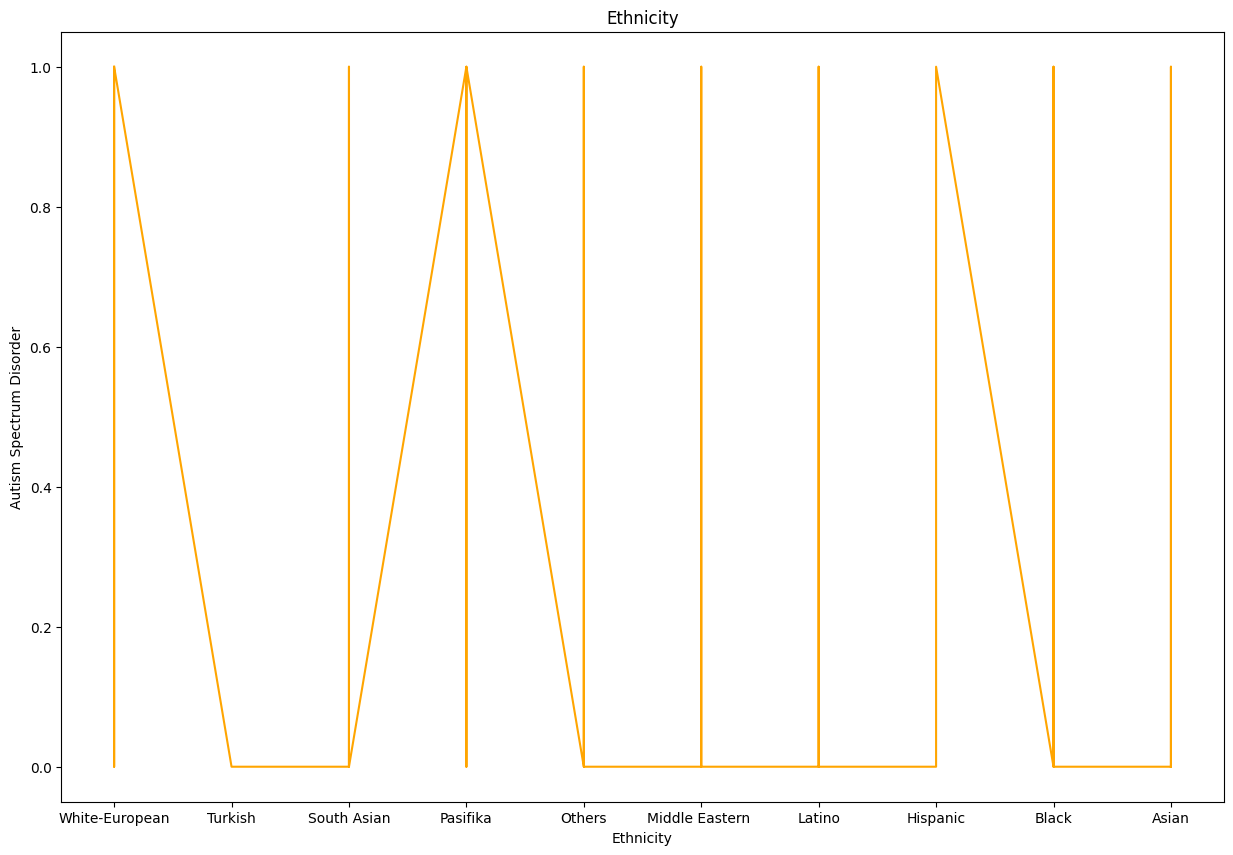

In [978]:
df2=df.sort_values(by='ethnicity',ascending=False)
plt.plot(df2.ethnicity,df2['Class/ASD'],color='orange')
plt.xlabel('Ethnicity')
plt.ylabel('Autism Spectrum Disorder')
plt.title('Ethnicity')
plt.gcf().set_size_inches(15,10)

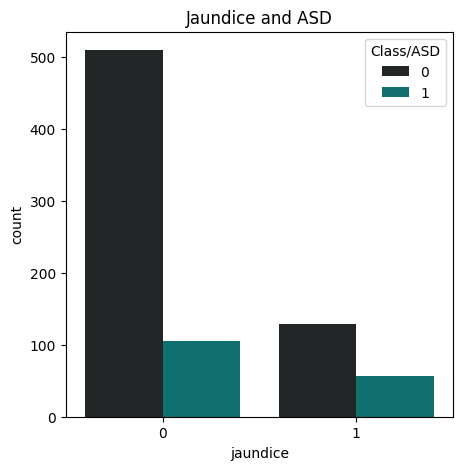

In [979]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='jaundice',color='teal', hue='Class/ASD')
plt.title('Jaundice and ASD')
plt.show()

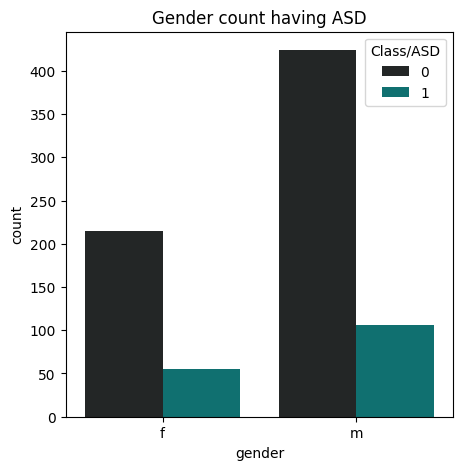

In [980]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='gender',color='teal', hue='Class/ASD')
plt.title('Gender count having ASD')
plt.show()

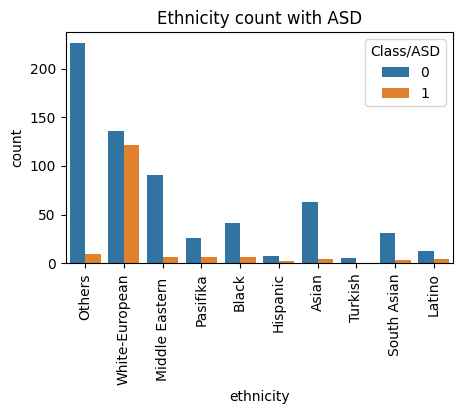

In [981]:
plt.figure(figsize=(5,3))
sns.countplot(data=df, x='ethnicity', hue='Class/ASD')
plt.xticks(rotation=90)
plt.title('Ethnicity count with ASD')
plt.show()

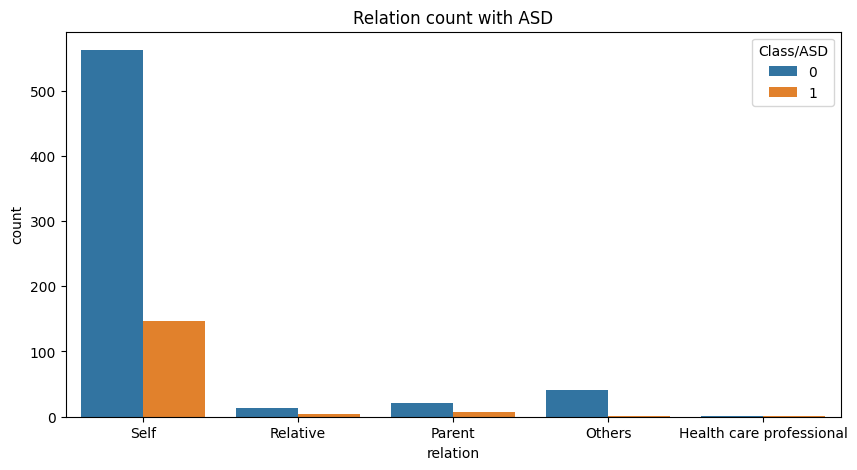

In [982]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='relation', hue='Class/ASD')
plt.title('Relation count with ASD')
plt.show()

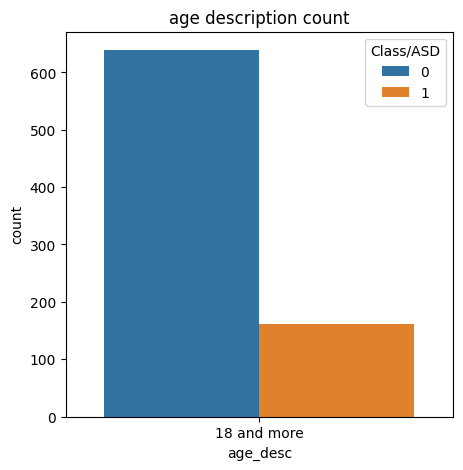

In [983]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='age_desc', hue='Class/ASD')
plt.title('age description count')
plt.show()

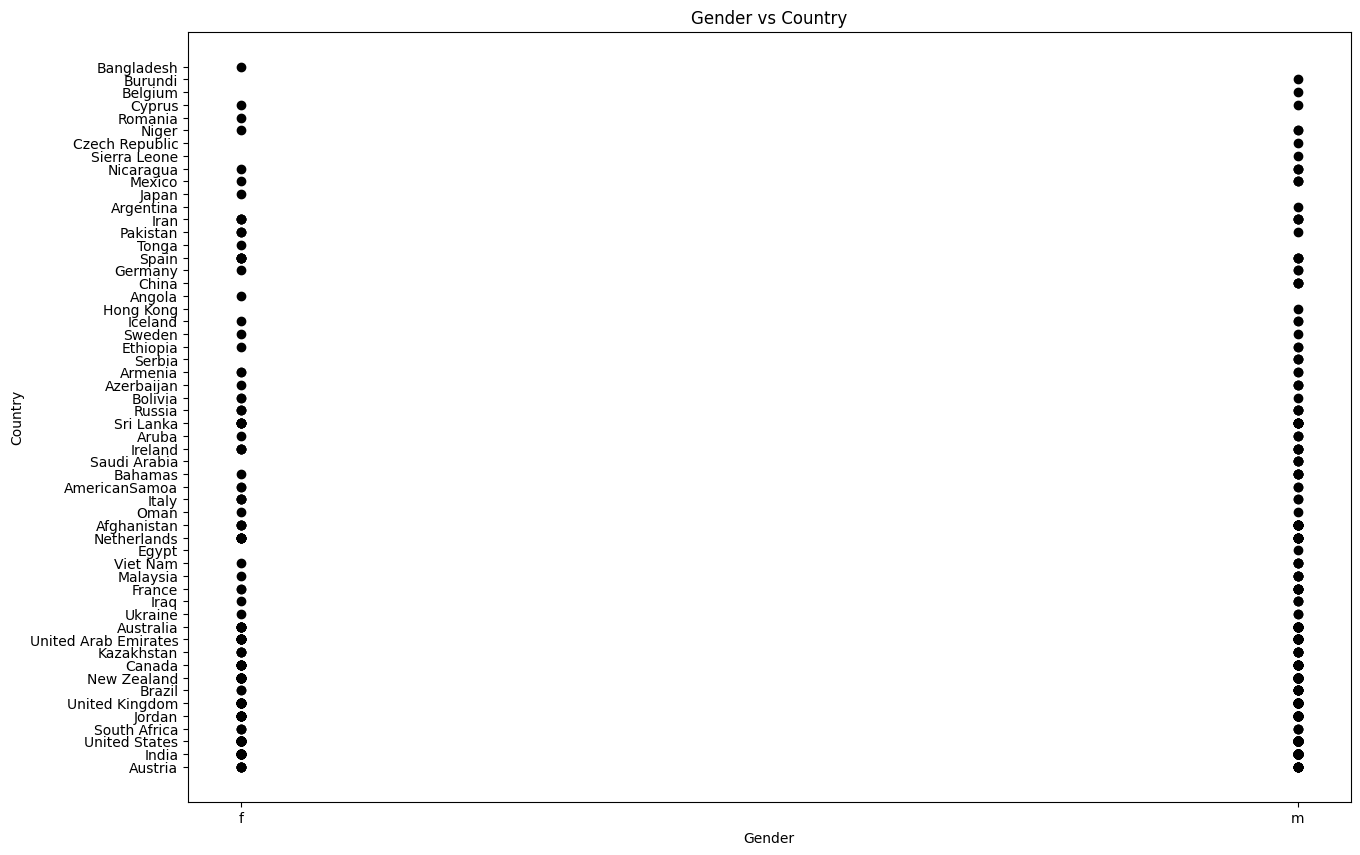

In [984]:
plt.scatter(x=df['gender'],y=df['contry_of_res'], color='black')
plt.xlabel('Gender')
plt.ylabel('Country')
plt.title('Gender vs Country')
plt.gcf().set_size_inches(15,10)

Text(0.5, 1.0, 'Relation vs Age')

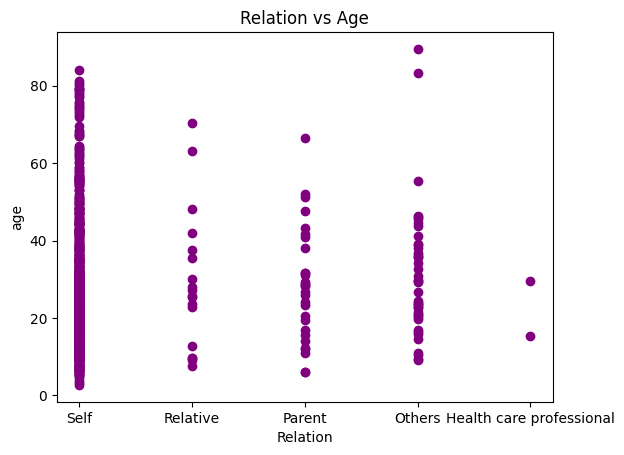

In [985]:
plt.scatter(x=df['relation'],y=df['age'], color='purple')
plt.xlabel('Relation')
plt.ylabel('age')
plt.title('Relation vs Age')

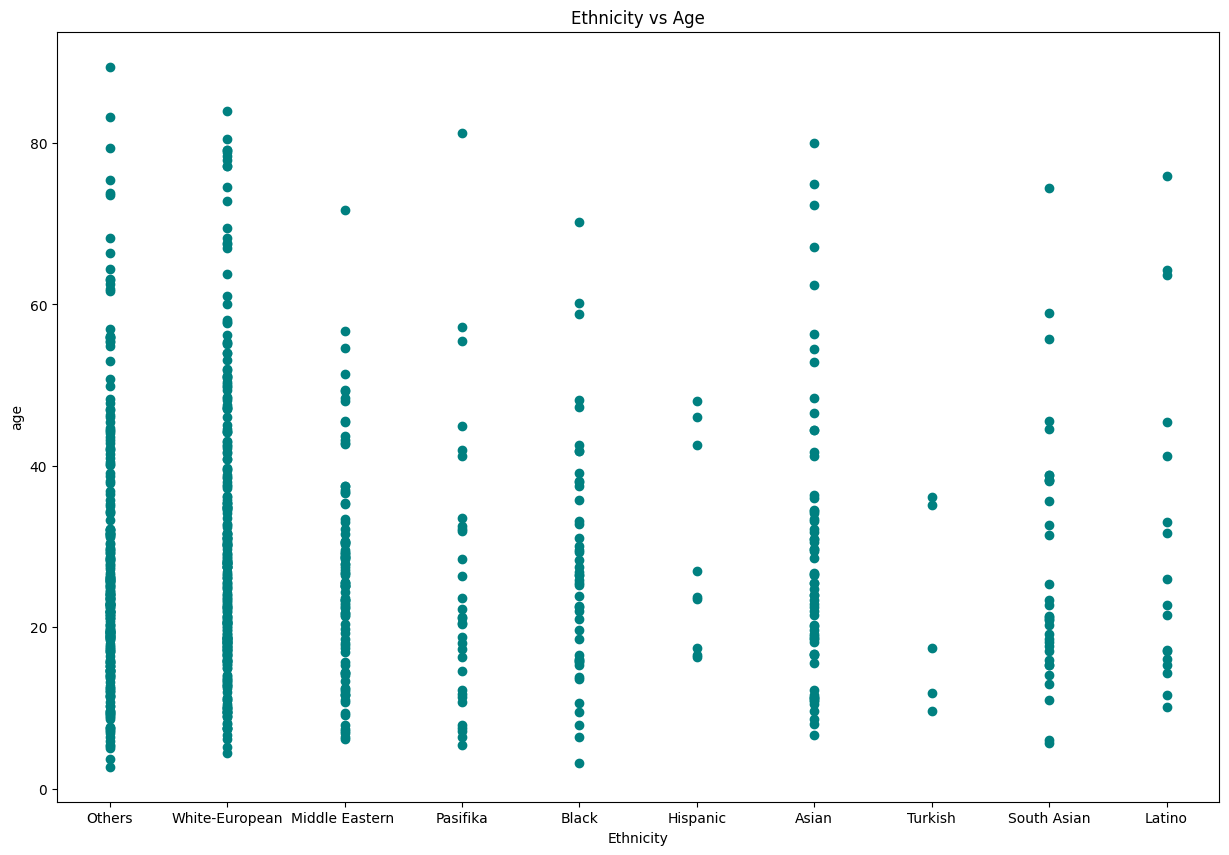

In [986]:
plt.scatter(x=df['ethnicity'],y=df['age'], color='teal')
plt.xlabel('Ethnicity')
plt.ylabel('age')
plt.title('Ethnicity vs Age')
plt.gcf().set_size_inches(15,10)

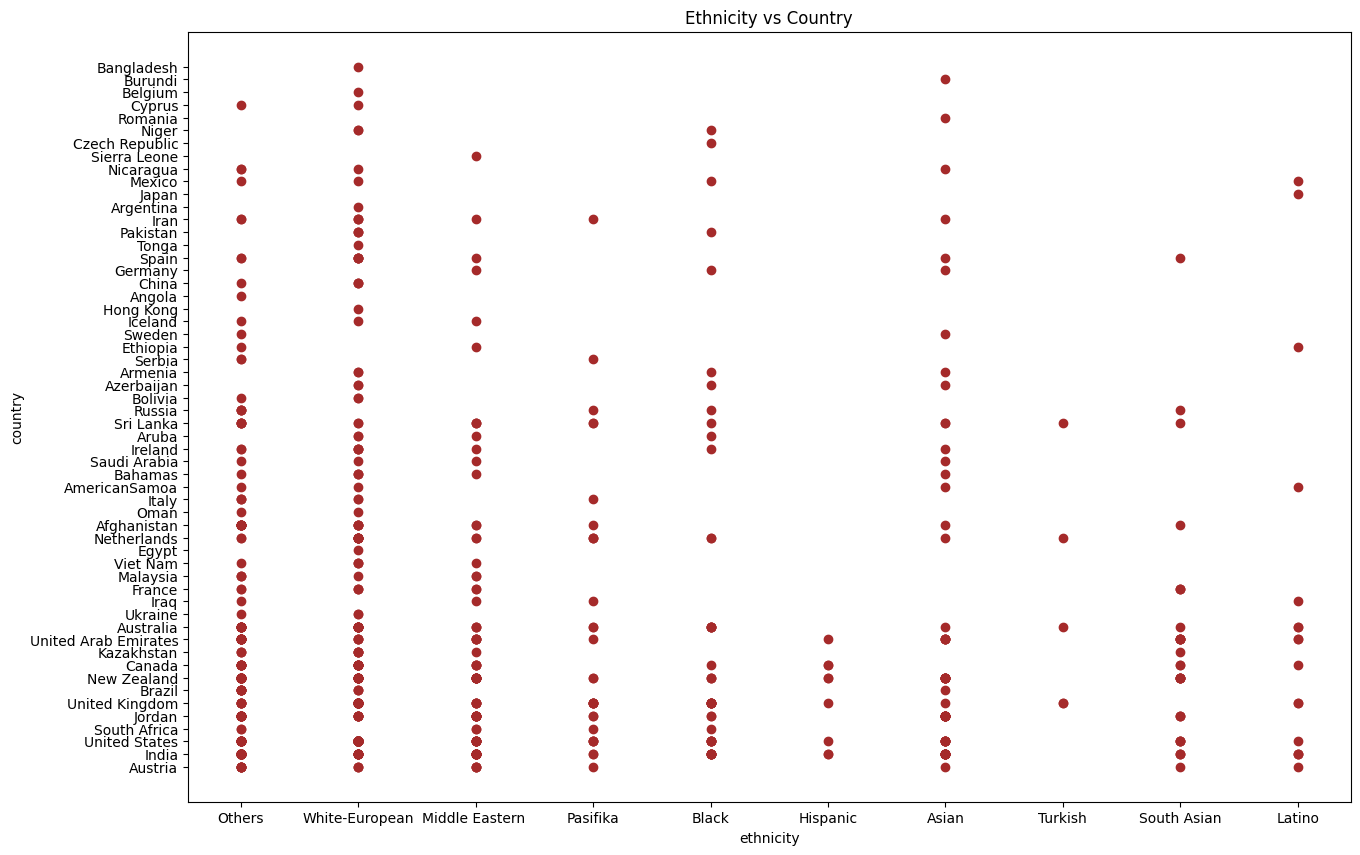

In [987]:
plt.scatter(x=df['ethnicity'],y=df['contry_of_res'], color='brown')
plt.xlabel('ethnicity')
plt.ylabel('country')
plt.title('Ethnicity vs Country')
plt.gcf().set_size_inches(15,10)

['age', 'result']


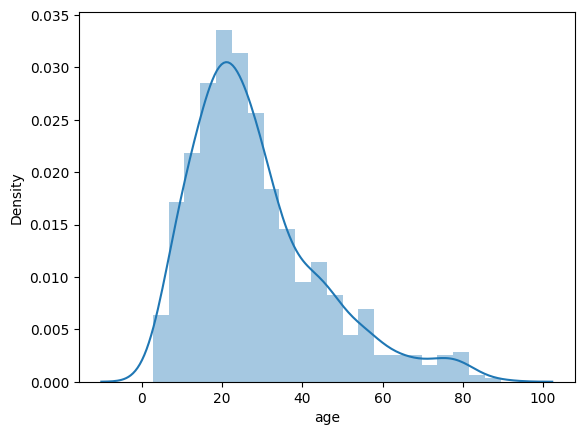

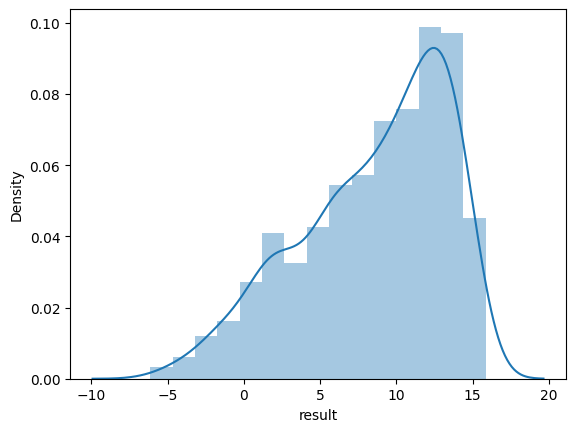

In [988]:
f=[]
for i in df.columns:
    if df[i].dtype==float:
        f.append(i)
print(f) 

for a,i in enumerate(f):    
    sns.distplot(df[i])
    plt.show()

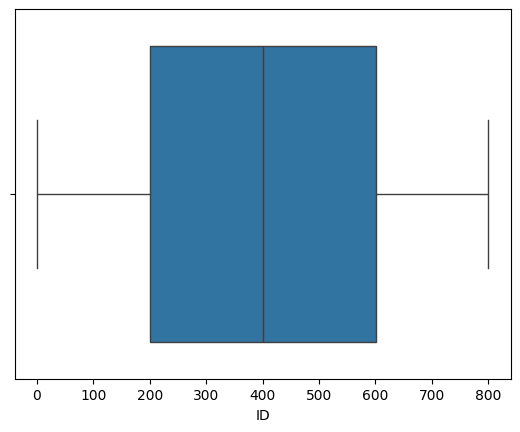

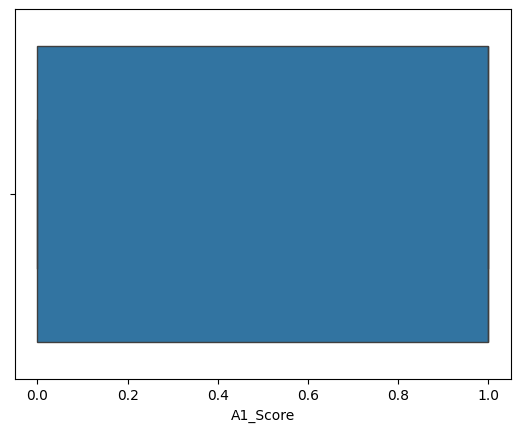

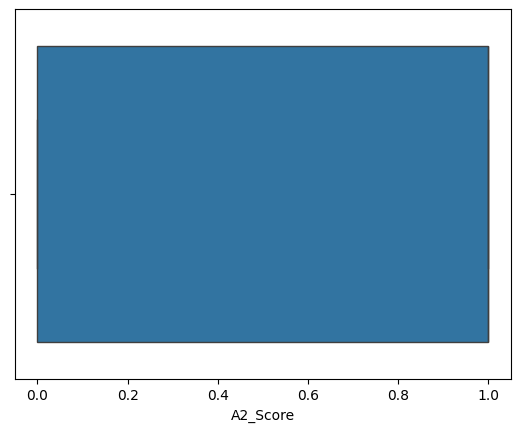

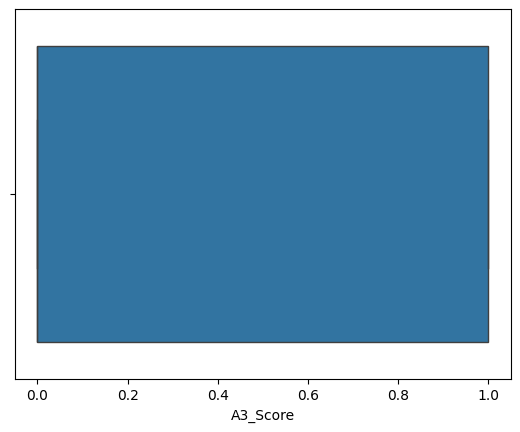

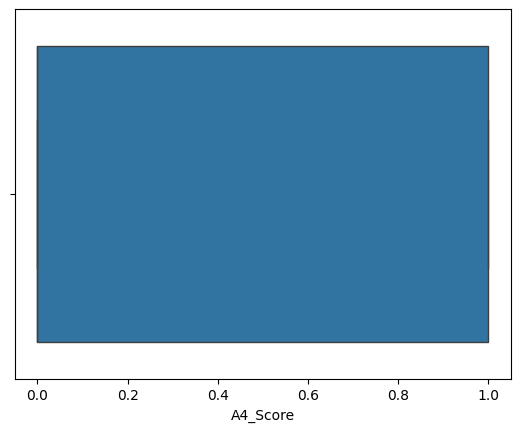

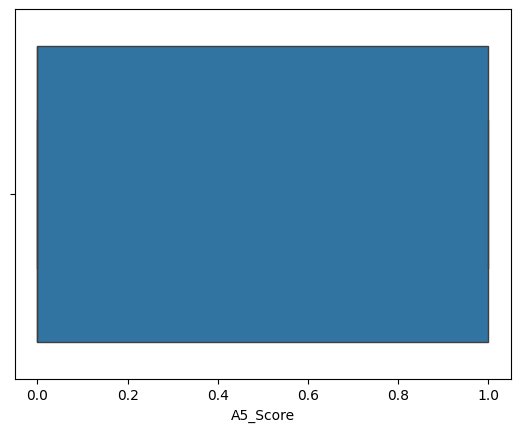

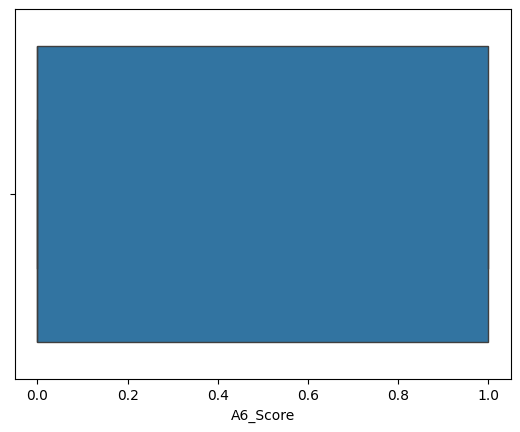

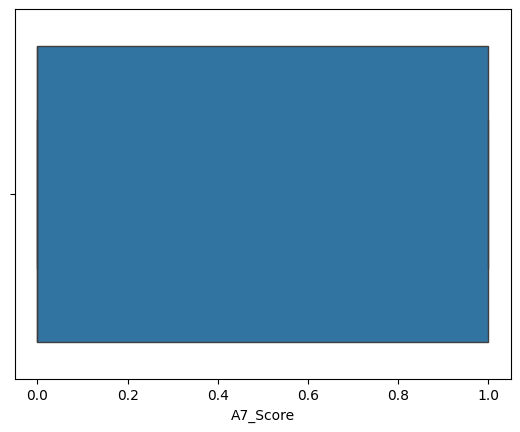

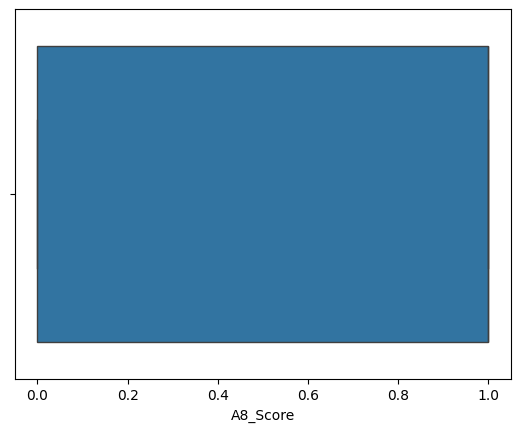

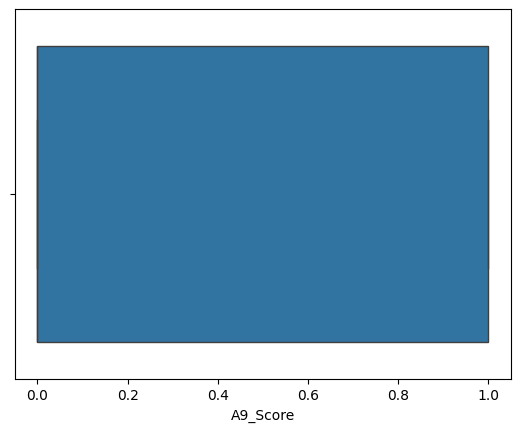

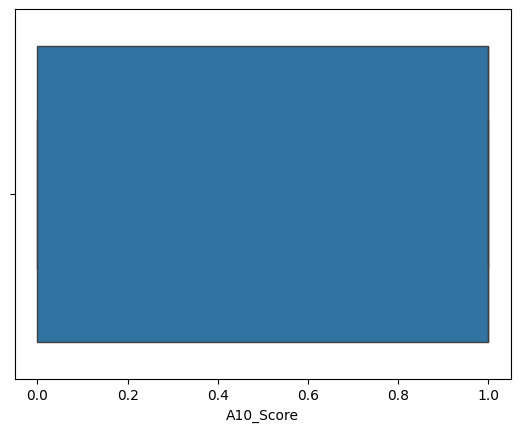

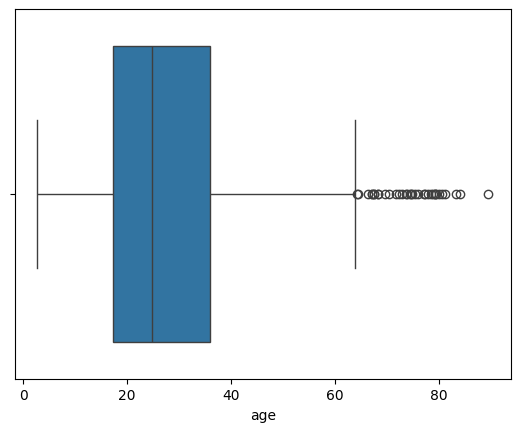

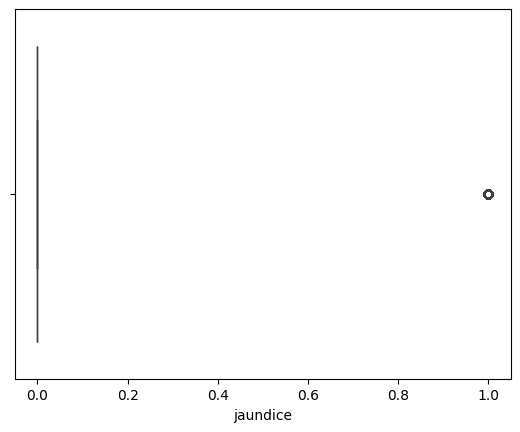

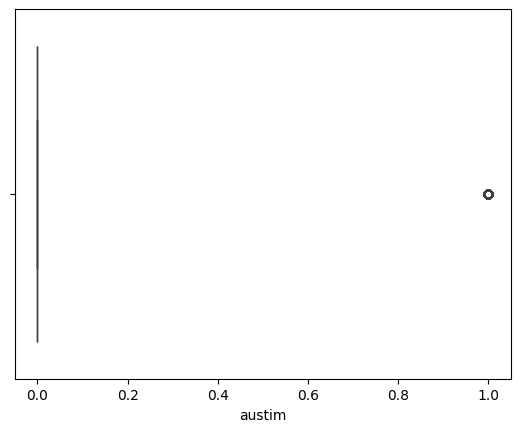

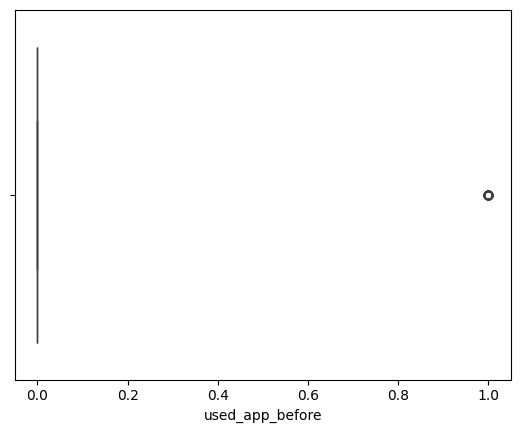

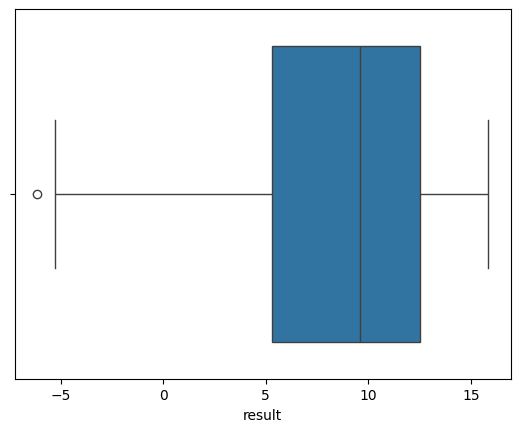

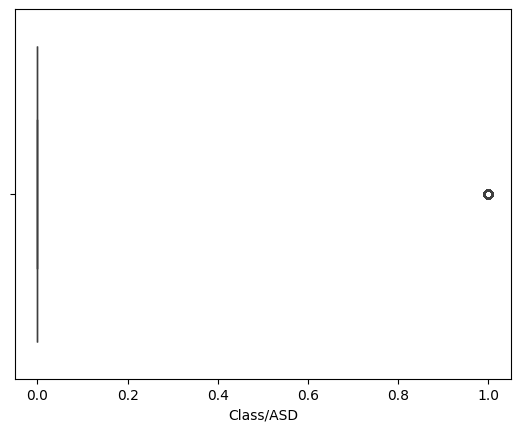

In [989]:
# looking  for outliers
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df, x=i)
    plt.show()
    

Feature Engineering

In [990]:
df['age_class'] = df['age'].apply(lambda x: 
  'toddler' if x < 4 else (
    'child' if x >= 4 and x < 12 else (
      'Teenager' if x >= 12 and x<18 else (
         'Adult' if x>=18 and x<50 else 'Senior'  
    )
  )
))
df

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD,age_class
0,1,1,0,1,0,1,0,1,0,1,...,Others,0,0,Austria,0,6.351166,18 and more,Self,0,Adult
1,2,0,0,0,0,0,0,0,0,0,...,Others,0,0,India,0,2.255185,18 and more,Self,0,Adult
2,3,1,1,1,1,1,1,1,1,1,...,White-European,0,1,United States,0,14.851484,18 and more,Self,1,child
3,4,0,0,0,0,0,0,0,0,0,...,Others,0,0,United States,0,2.276617,18 and more,Self,0,Adult
4,5,0,0,0,0,0,0,0,0,0,...,Others,0,0,South Africa,0,-4.777286,18 and more,Self,0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,0,1,0,0,0,0,0,0,1,...,Hispanic,0,0,New Zealand,0,12.999501,18 and more,Self,0,Teenager
796,797,0,1,1,0,0,1,0,1,1,...,White-European,0,0,Cyprus,0,13.561518,18 and more,Self,0,Adult
797,798,0,0,0,0,0,0,0,0,0,...,South Asian,1,0,New Zealand,0,2.653177,18 and more,Self,0,child
798,799,0,0,0,0,0,0,0,0,0,...,Others,0,0,Canada,0,9.069342,18 and more,Self,0,Teenager


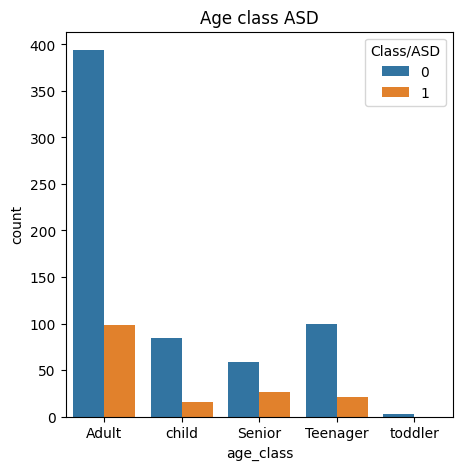

In [991]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='age_class', hue='Class/ASD')
plt.title('Age class ASD')
plt.show()

In [992]:
# IQR Method
q1=df['age'].quantile(0.25)
q3=df['age'].quantile(0.75)
iqr=q3-q1
lwr=q1-1.5*iqr
upr=q3+1.5*iqr
df['age']=np.where(df['age']>upr,upr,np.where(df['age']<lwr,lwr,df['age']))

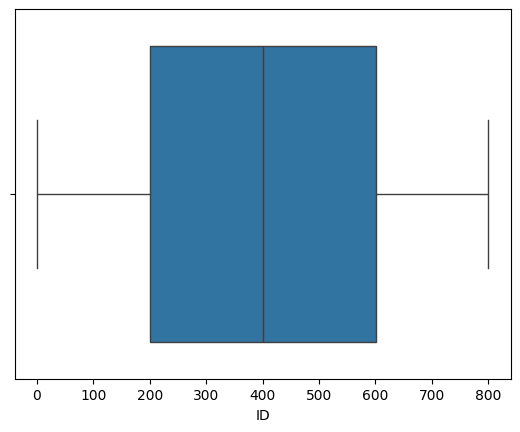

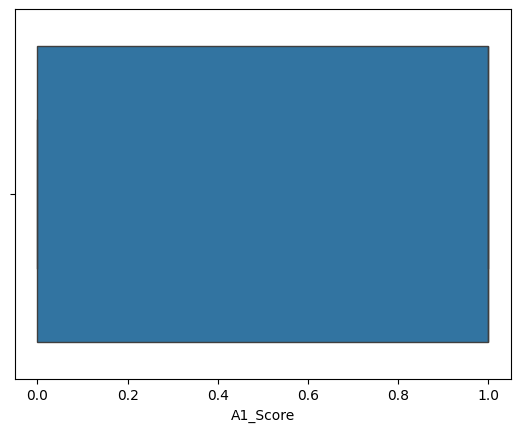

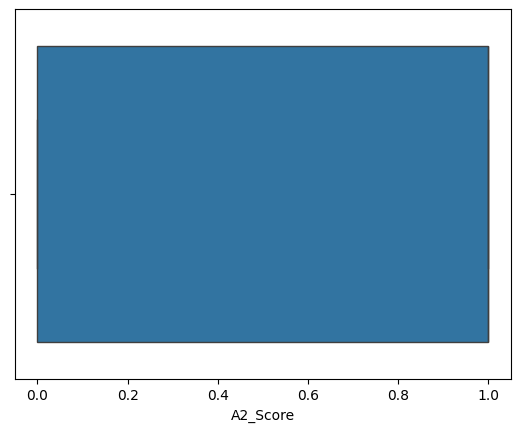

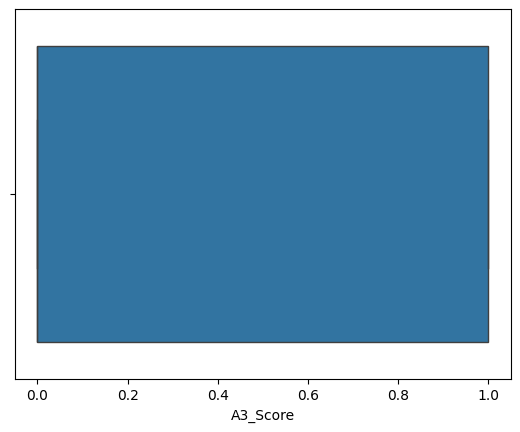

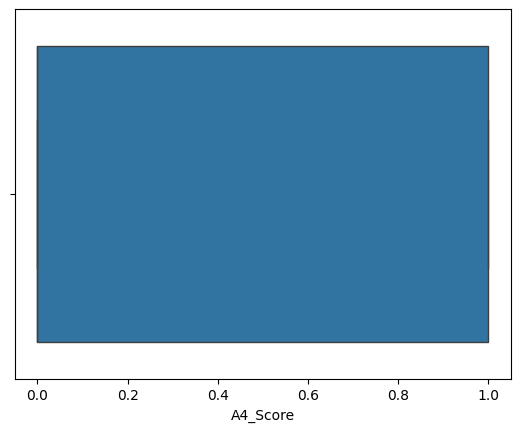

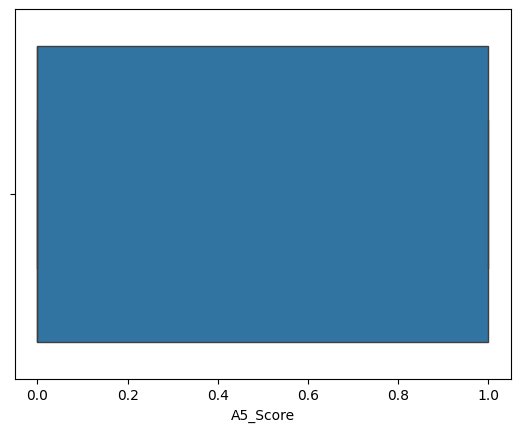

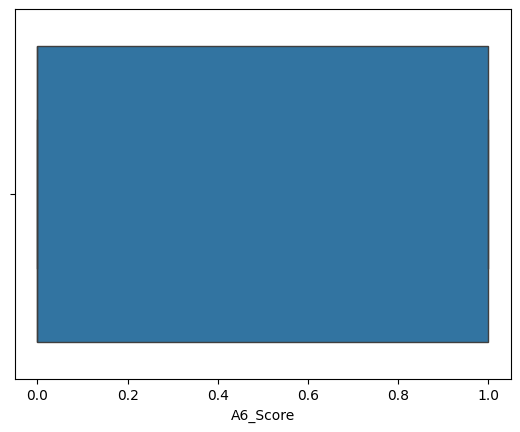

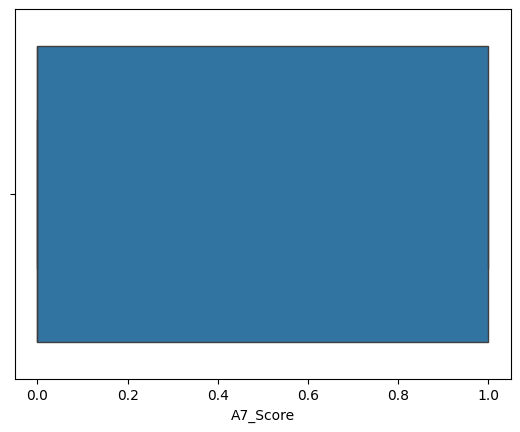

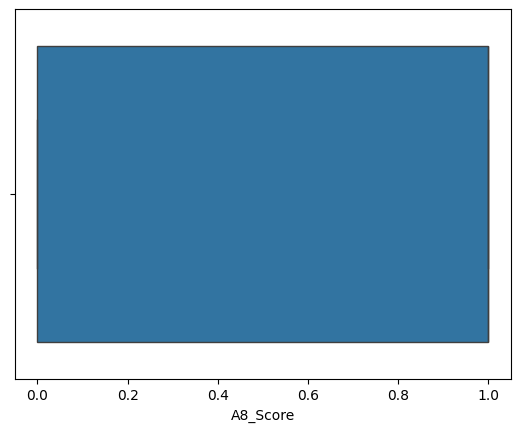

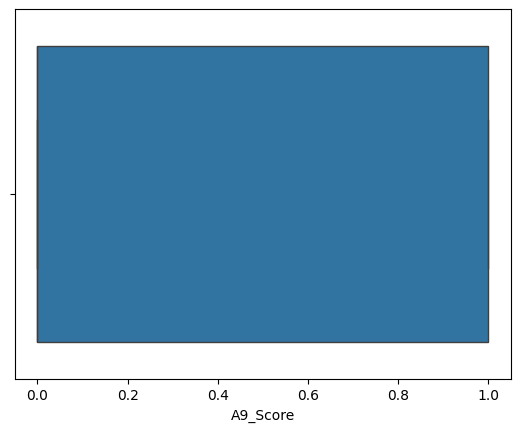

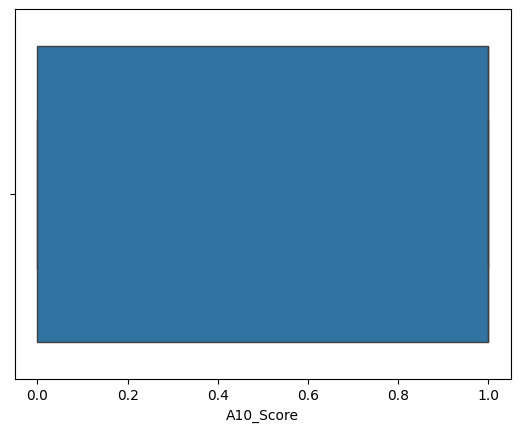

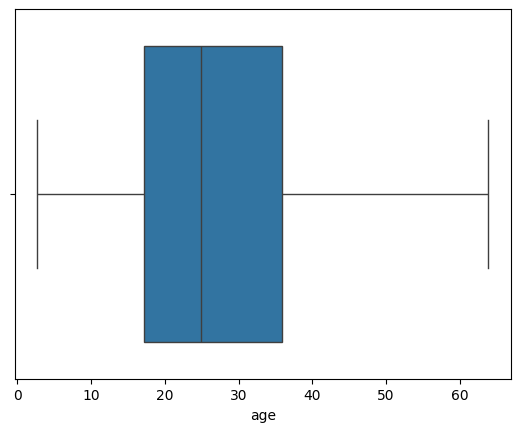

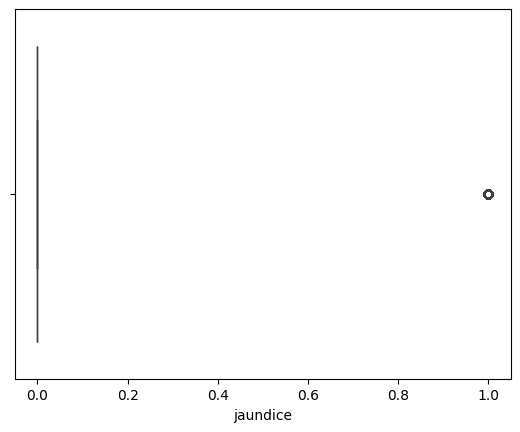

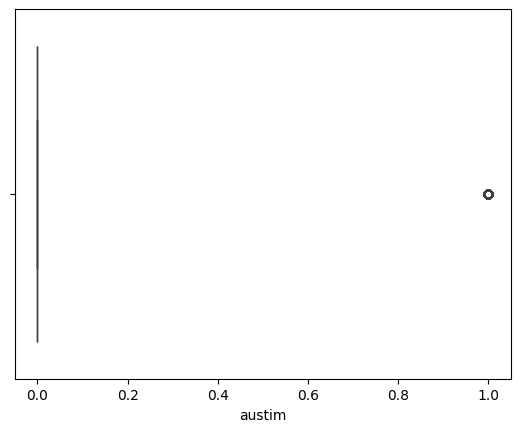

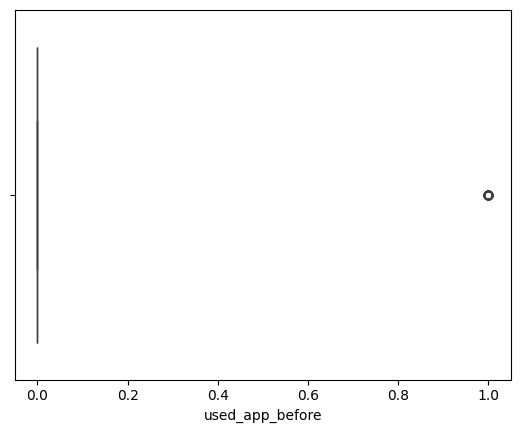

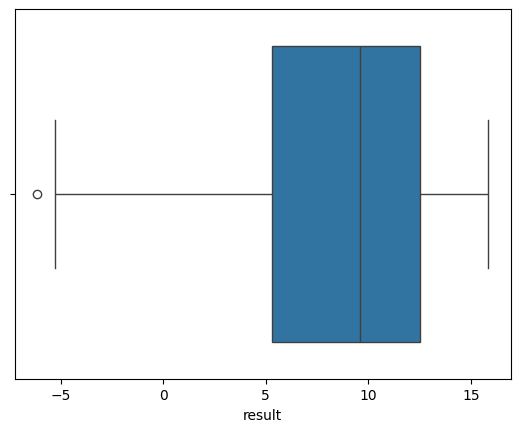

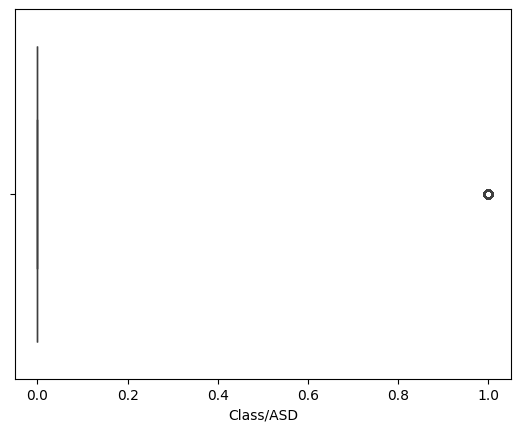

In [993]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df, x=i)
    plt.show()

In [994]:
#Encoding categorical values
from sklearn.preprocessing import LabelEncoder 
def labels(data):
    for i in data.columns:
        if data[i].dtype=='object':
            l=LabelEncoder()
            data[i]=l.fit_transform(data[i])
    return data
df=labels(df)


In [995]:
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD',
       'age_class'],
      dtype='object')

In [996]:
# separating features and target
list1=['ID','age_desc','used_app_before','austim']
features=df.drop(list1+['Class/ASD'], axis=1)
target=df['Class/ASD']

In [997]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.25,random_state=10)
r=RandomOverSampler(sampling_strategy='minority', random_state=0)
X,y=r.fit_resample(X_train,y_train)
X.shape,y.shape

((964, 18), (964,))

In [998]:
# Normalize the features
scaler = MinMaxScaler(feature_range=(0, 1))
X=scaler.fit_transform(X)
X_test=scaler.transform(X_test)


Model training and tesing

In [999]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error
from sklearn.naive_bayes import GaussianNB

alg=[GaussianNB(),KNeighborsClassifier(n_neighbors=15),XGBClassifier(reg_alpha=10),LogisticRegression(C=10,solver='lbfgs'),RandomForestClassifier(max_depth=5,n_estimators=100),DecisionTreeClassifier(max_depth=5),SVC(kernel='linear')]
for i in alg:
    i.fit(X,y)
    print( 'Training accuracy:',metrics.roc_auc_score(y,i.predict(X))*100)
    print( 'Testing Accuracy:',metrics.roc_auc_score(y_test,i.predict(X_test))*100)
   # print('MAE:', mean_absolute_error(y_test,y_pred))

Training accuracy: 85.06224066390041
Testing Accuracy: 80.5065916160569
Training accuracy: 87.24066390041494
Testing Accuracy: 82.40260702118206
Training accuracy: 92.0124481327801
Testing Accuracy: 78.61057621093171
Training accuracy: 86.09958506224066
Testing Accuracy: 82.30632498889054
Training accuracy: 91.28630705394191
Testing Accuracy: 81.78047696637536
Training accuracy: 91.70124481327801
Testing Accuracy: 78.08472818841653
Training accuracy: 86.82572614107883
Testing Accuracy: 82.62479632647016


Confusion Matrix for visualization of the models

XGBClassifier


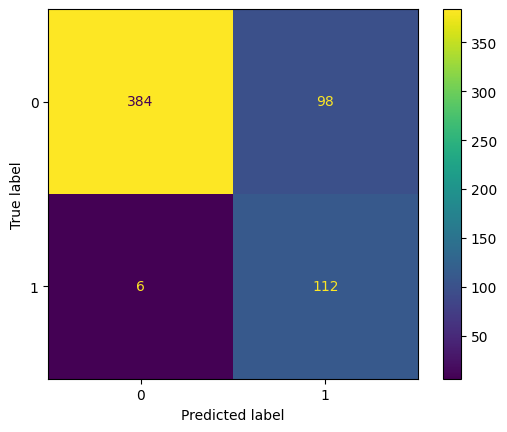

In [1000]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
print('XGBClassifier')
model=XGBClassifier(reg_alpha=10)
model.fit(X,y)


predicted_labels = model.predict(X_train)
cm=confusion_matrix(y_train, predicted_labels)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()


Random Forest


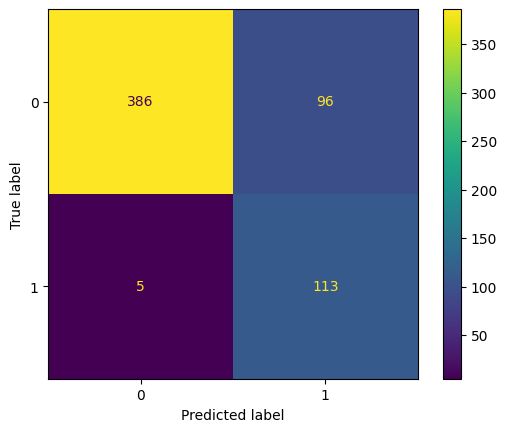

In [1001]:
print('Random Forest')
model=RandomForestClassifier(max_depth=5,n_estimators=100)
model.fit(X,y)

predicted_labels = model.predict(X_train)
cm=confusion_matrix(y_train, predicted_labels)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()


Decision Tree


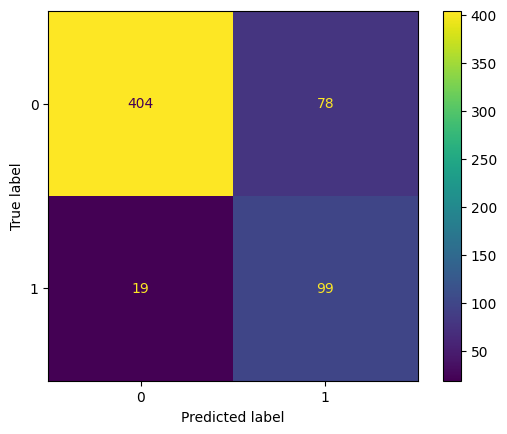

In [1002]:
print('Decision Tree')
model=DecisionTreeClassifier(max_depth=5)
model.fit(X,y)

predicted_labels = model.predict(X_train)
cm=confusion_matrix(y_train, predicted_labels)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
